In [2]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Load the dataset
# data = pd.read_csv('data.csv')

# # Display the first few rows of the dataset
# print(data.head())

# # Display basic information about the dataset
# print(data.info())

# # Display summary statistics of the dataset
# print(data.describe())

# # Check for missing values
# print(data.isnull().sum())

# # Plot histograms for numerical columns
# data.hist(bins=30, figsize=(15, 10))
# plt.show()

# # Plot correlation matrix
# plt.figure(figsize=(12, 8))
# sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
# plt.show()

# # Plot pairplot for numerical columns
# sns.pairplot(data)
# plt.show()

# # Plot countplot for categorical columns
# for column in data.select_dtypes(include=['object']).columns:
#     plt.figure(figsize=(10, 5))
#     sns.countplot(data[column])
#     plt.show()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
customers = pd.read_csv('Customers.csv')
product = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [10]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [11]:
product.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [13]:
transactions.head() # for display few rows of each data set

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [14]:
# info -> for checking datatype
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [15]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [16]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [19]:
# to check null value 
customers.isnull().sum()
product.isnull().sum()
transactions.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

In [23]:
# merged all 3 dataset into 1
merged_df = transactions.merge(customers,on ='CustomerID').merge(product,on = 'ProductID')
merged_df.head()


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [28]:
merged_df["TransactionDate"] = pd.to_datetime(merged_df["TransactionDate"])
merged_df["SignupDate"] = pd.to_datetime(merged_df["SignupDate"])
merged_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


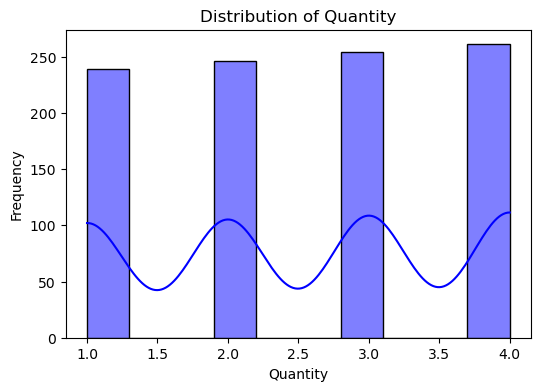

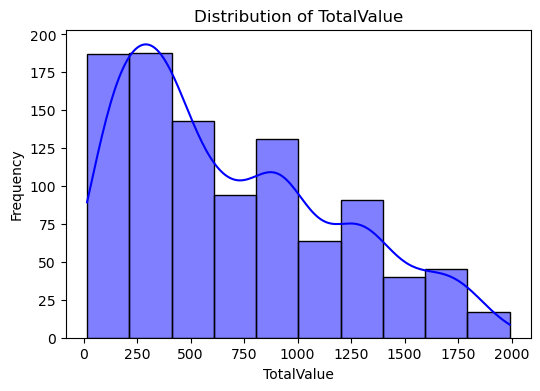

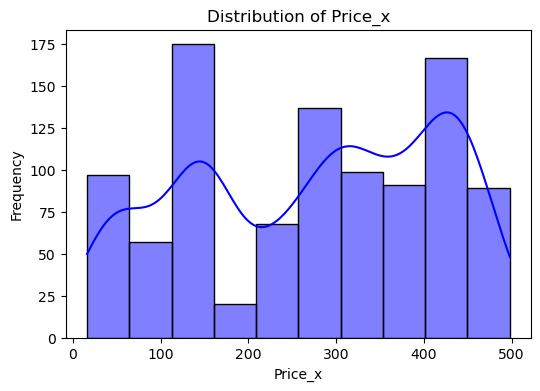

In [33]:
# try univarite anlz -> a statistical method that examines a single variable in a data set
# 2 type -> numerical and categorial

# Q. Analyze distributions of Quantity, TotalValue, and Price_x.
numerical_col = ["Quantity", "TotalValue", "Price_x"]
for col in numerical_col:
    plt.figure(figsize=(6, 4))
    sns.histplot(merged_df[col], kde=True, bins=10, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

C:\Users\shuva\AppData\Local\Temp\ipykernel_13204\145458115.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = merged_df , x = col , palette = "viridis")


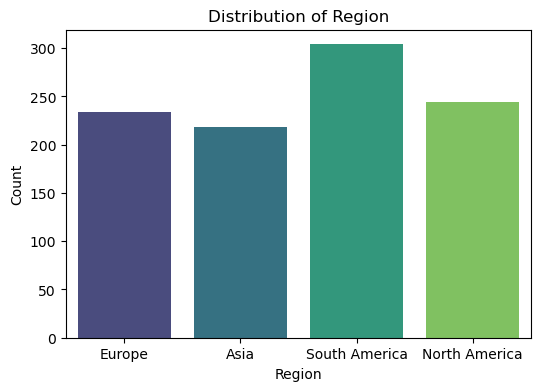

C:\Users\shuva\AppData\Local\Temp\ipykernel_13204\145458115.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = merged_df , x = col , palette = "viridis")


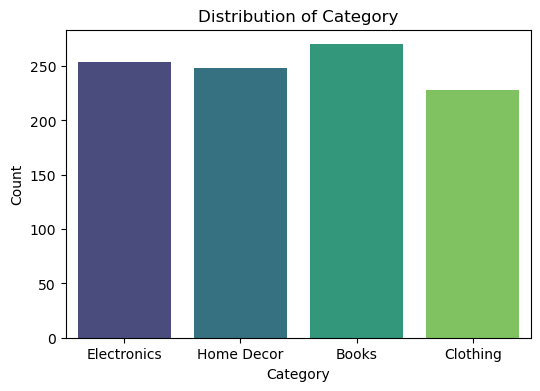

In [38]:
# Categorical anlz
# Q. Analyze distributions of Region and Category.

categorical_col = ['Region','Category']
for col in categorical_col:
    plt.figure(figsize = (6,4))
    sns.countplot(data = merged_df , x = col , palette = "viridis")
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

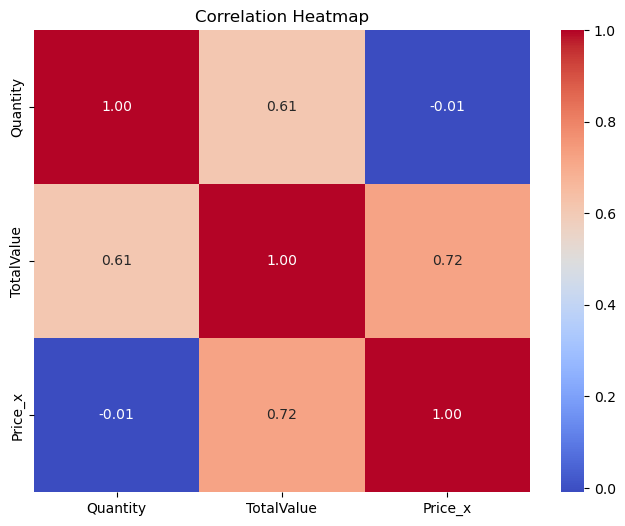

In [39]:
# Bivariate Anlyz
# Correction betwn Numerical variables
 # Correlation heatmap
plt.figure(figsize=(8, 6))
corr_matrix = merged_df[["Quantity", "TotalValue", "Price_x"]].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()



Customer Behavior by Region

C:\Users\shuva\AppData\Local\Temp\ipykernel_13204\4275454416.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x="Region", y="TotalValue", palette="Set2")


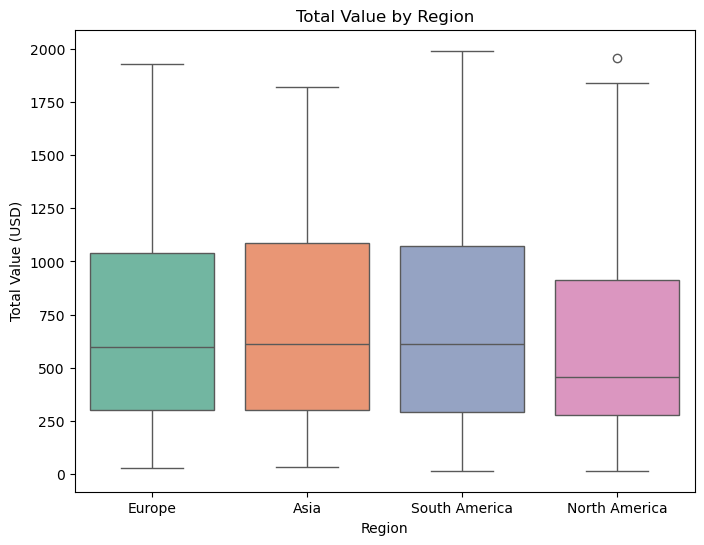

In [40]:
# Box plot of TotalValue by Region
plt.figure(figsize=(8, 6))
sns.boxplot(data=merged_df, x="Region", y="TotalValue", palette="Set2")
plt.title("Total Value by Region")
plt.xlabel("Region")
plt.ylabel("Total Value (USD)")
plt.show()


<h3>Product Performance by Category</h3>

C:\Users\shuva\AppData\Local\Temp\ipykernel_13204\4195584557.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_performance, x="Category", y="TotalValue", palette="pastel")


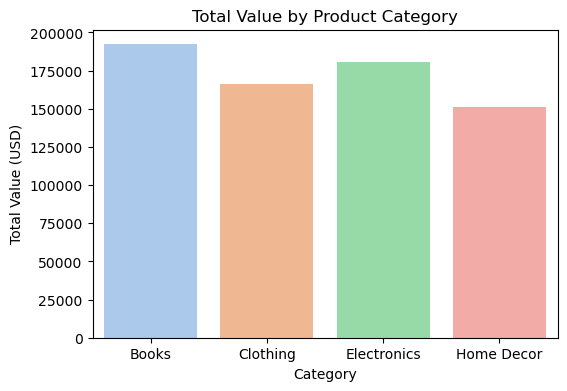

In [41]:
# Analyze total value by product category.

# Bar plot of TotalValue by Category
category_performance = merged_df.groupby("Category")["TotalValue"].sum().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(data=category_performance, x="Category", y="TotalValue", palette="pastel")
plt.title("Total Value by Product Category")
plt.xlabel("Category")
plt.ylabel("Total Value (USD)")
plt.show()


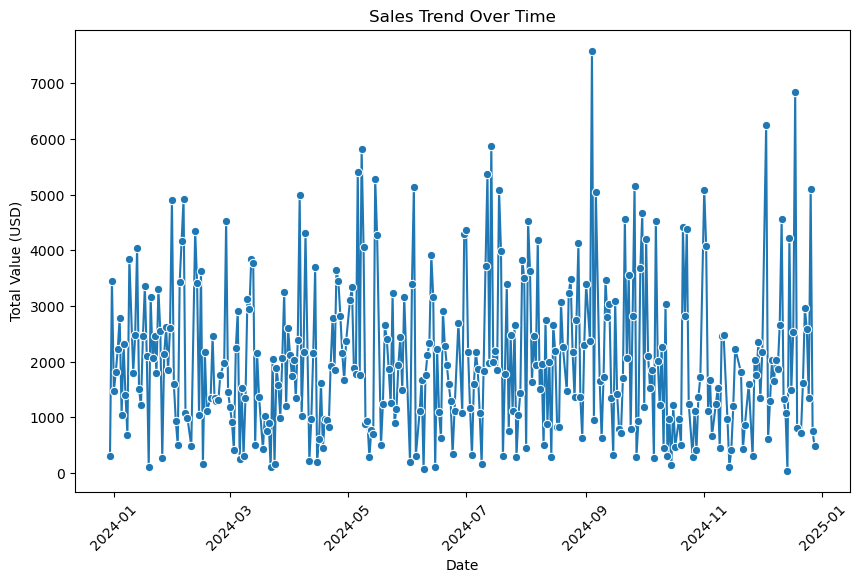

In [42]:
# Line plot for TotalValue over time
sales_trend = merged_df.groupby(merged_df["TransactionDate"].dt.date)["TotalValue"].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=sales_trend, x="TransactionDate", y="TotalValue", marker="o")
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Value (USD)")
plt.xticks(rotation=45)
plt.show()


<h3> Quantity vs. TotalValue </h3>

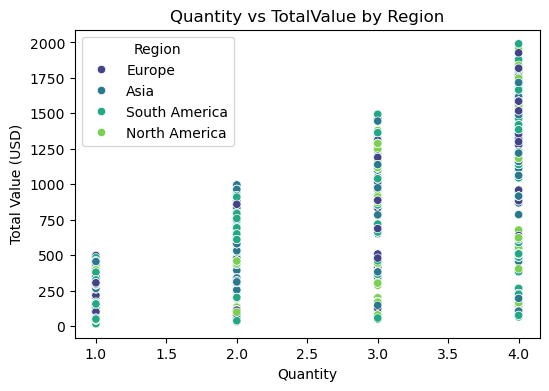

In [43]:
# Scatter plot of Quantity vs TotalValue
plt.figure(figsize=(6, 4))
sns.scatterplot(data=merged_df, x="Quantity", y="TotalValue", hue="Region", palette="viridis")
plt.title("Quantity vs TotalValue by Region")
plt.xlabel("Quantity")
plt.ylabel("Total Value (USD)")
plt.show()


<h3>Bussiness insights</h3>

<h4>Top-Selling Products </h4>

C:\Users\shuva\AppData\Local\Temp\ipykernel_13204\75333433.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x="TotalRevenue", y="ProductName", palette="Blues_r")


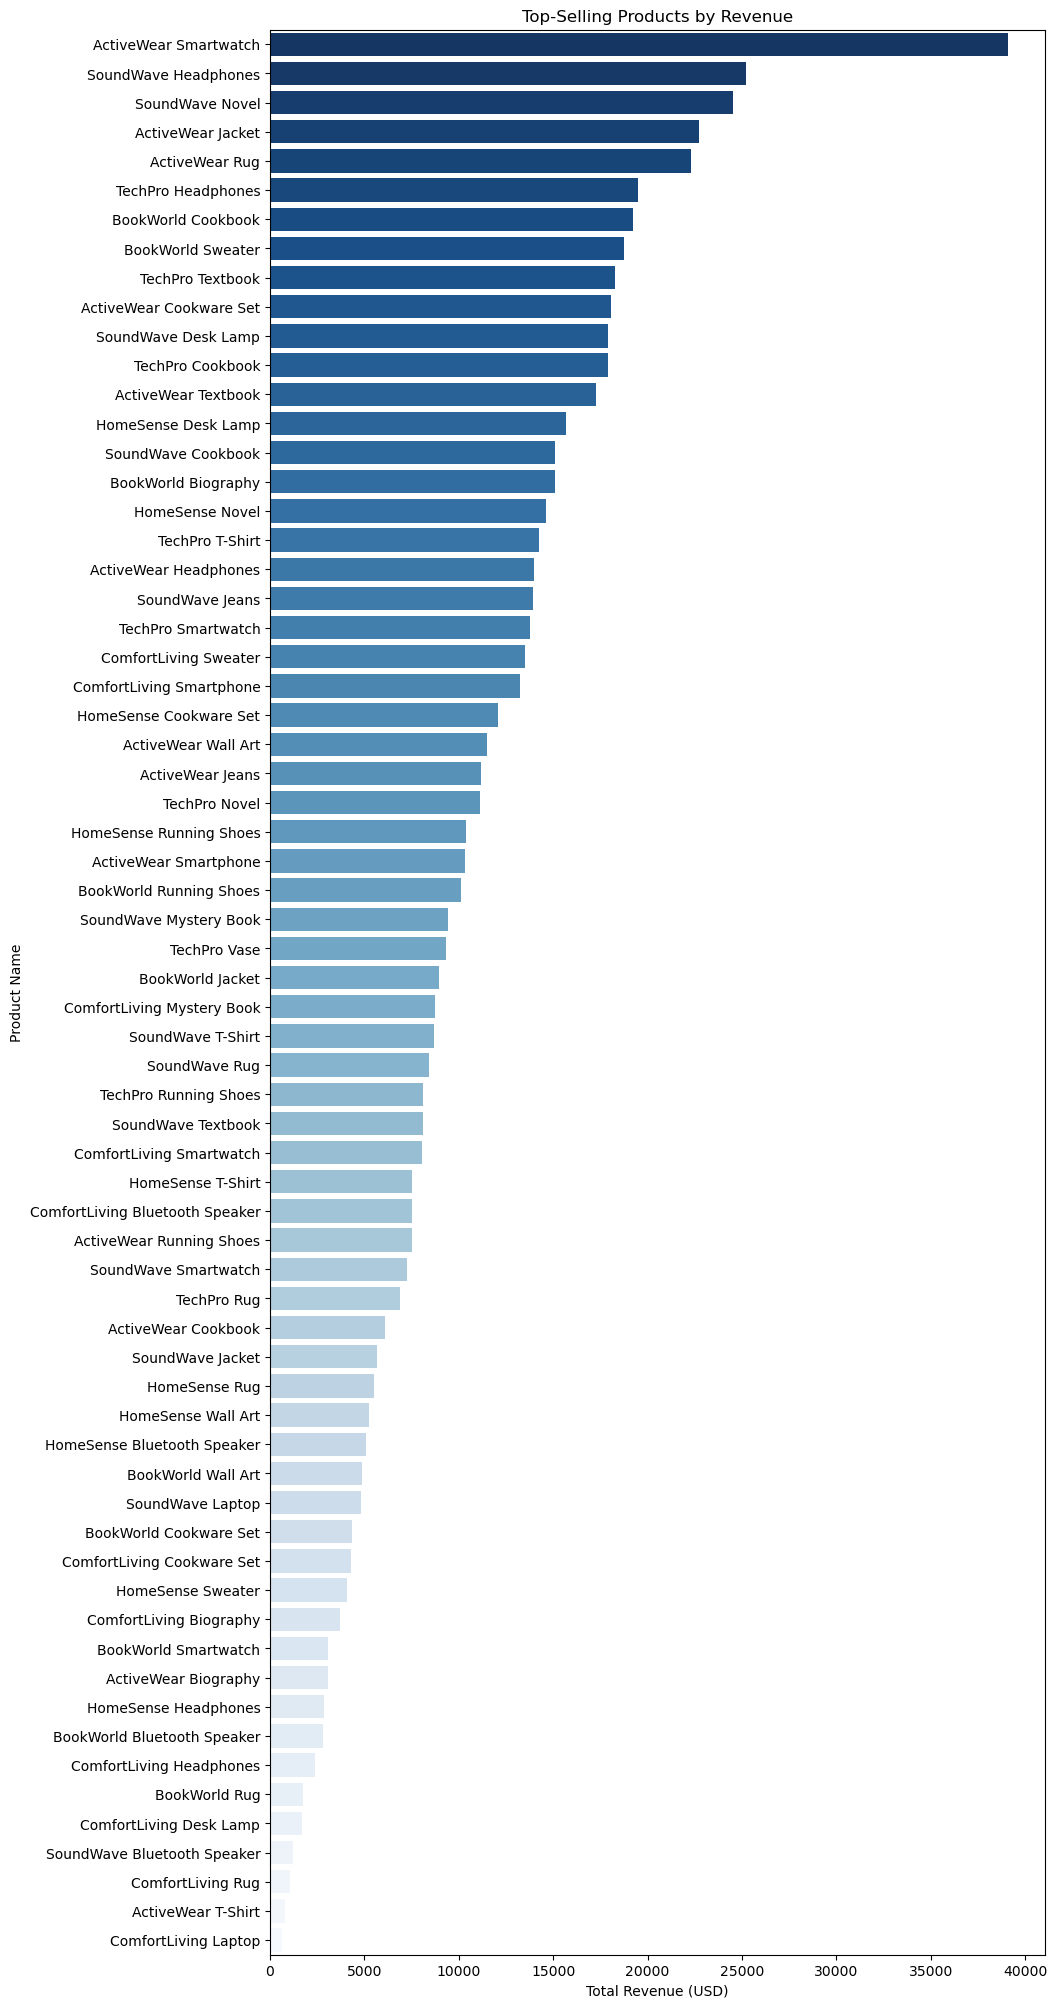

                    ProductName  TotalRevenue  TransactionCount
9         ActiveWear Smartwatch      39096.97                40
47         SoundWave Headphones      25211.64                38
52              SoundWave Novel      24507.90                20
4             ActiveWear Jacket      22712.56                26
6                ActiveWear Rug      22314.43                29
..                          ...           ...               ...
26      ComfortLiving Desk Lamp       1694.16                10
44  SoundWave Bluetooth Speaker       1223.22                 7
30            ComfortLiving Rug       1063.81                 8
10           ActiveWear T-Shirt        795.34                10
28         ComfortLiving Laptop        647.76                10

[66 rows x 3 columns]


In [48]:
# Group by ProductName
product_sales = merged_df.groupby("ProductName").agg(
    TotalRevenue=("TotalValue", "sum"),
    TransactionCount=("TransactionID", "count")
).reset_index()

# Sort by Total Revenue
top_products = product_sales.sort_values(by="TotalRevenue", ascending=False)

# Visualize
plt.figure(figsize=(10, 25))
sns.barplot(data=top_products, x="TotalRevenue", y="ProductName", palette="Blues_r")
plt.title("Top-Selling Products by Revenue")
plt.xlabel("Total Revenue (USD)")
plt.ylabel("Product Name")
plt.show()

print(top_products)


<h3>Smart sales anlz </h3>

C:\Users\shuva\AppData\Local\Temp\ipykernel_13204\118576596.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_sales, x="Region", y="TotalRevenue", palette="coolwarm")


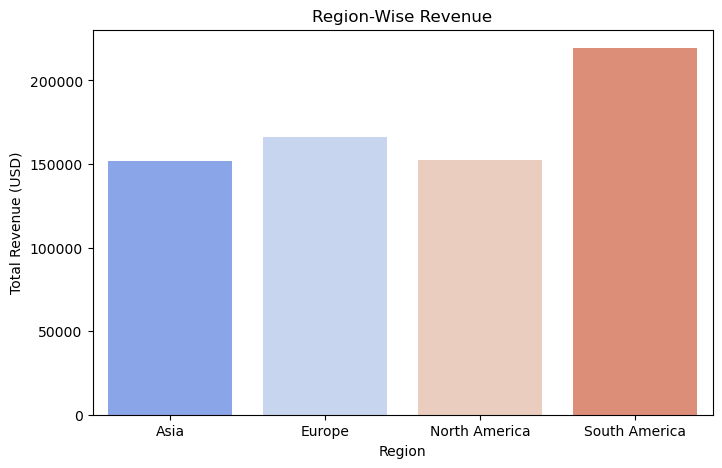

          Region  TotalRevenue  TransactionCount
0           Asia     152074.97               218
1         Europe     166254.63               234
2  North America     152313.40               244
3  South America     219352.56               304


In [49]:
# Group by Region
region_sales = merged_df.groupby("Region").agg(
    TotalRevenue=("TotalValue", "sum"),
    TransactionCount=("TransactionID", "count")
).reset_index()

# Visualize
plt.figure(figsize=(8, 5))
sns.barplot(data=region_sales, x="Region", y="TotalRevenue", palette="coolwarm")
plt.title("Region-Wise Revenue")
plt.xlabel("Region")
plt.ylabel("Total Revenue (USD)")
plt.show()

print(region_sales)


<h3>
    Calculate average revenue per customer to identify high-value customers.
</h3>

C:\Users\shuva\AppData\Local\Temp\ipykernel_13204\3661729948.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=high_value_customers, x="TotalRevenue", y="CustomerID", palette="viridis")


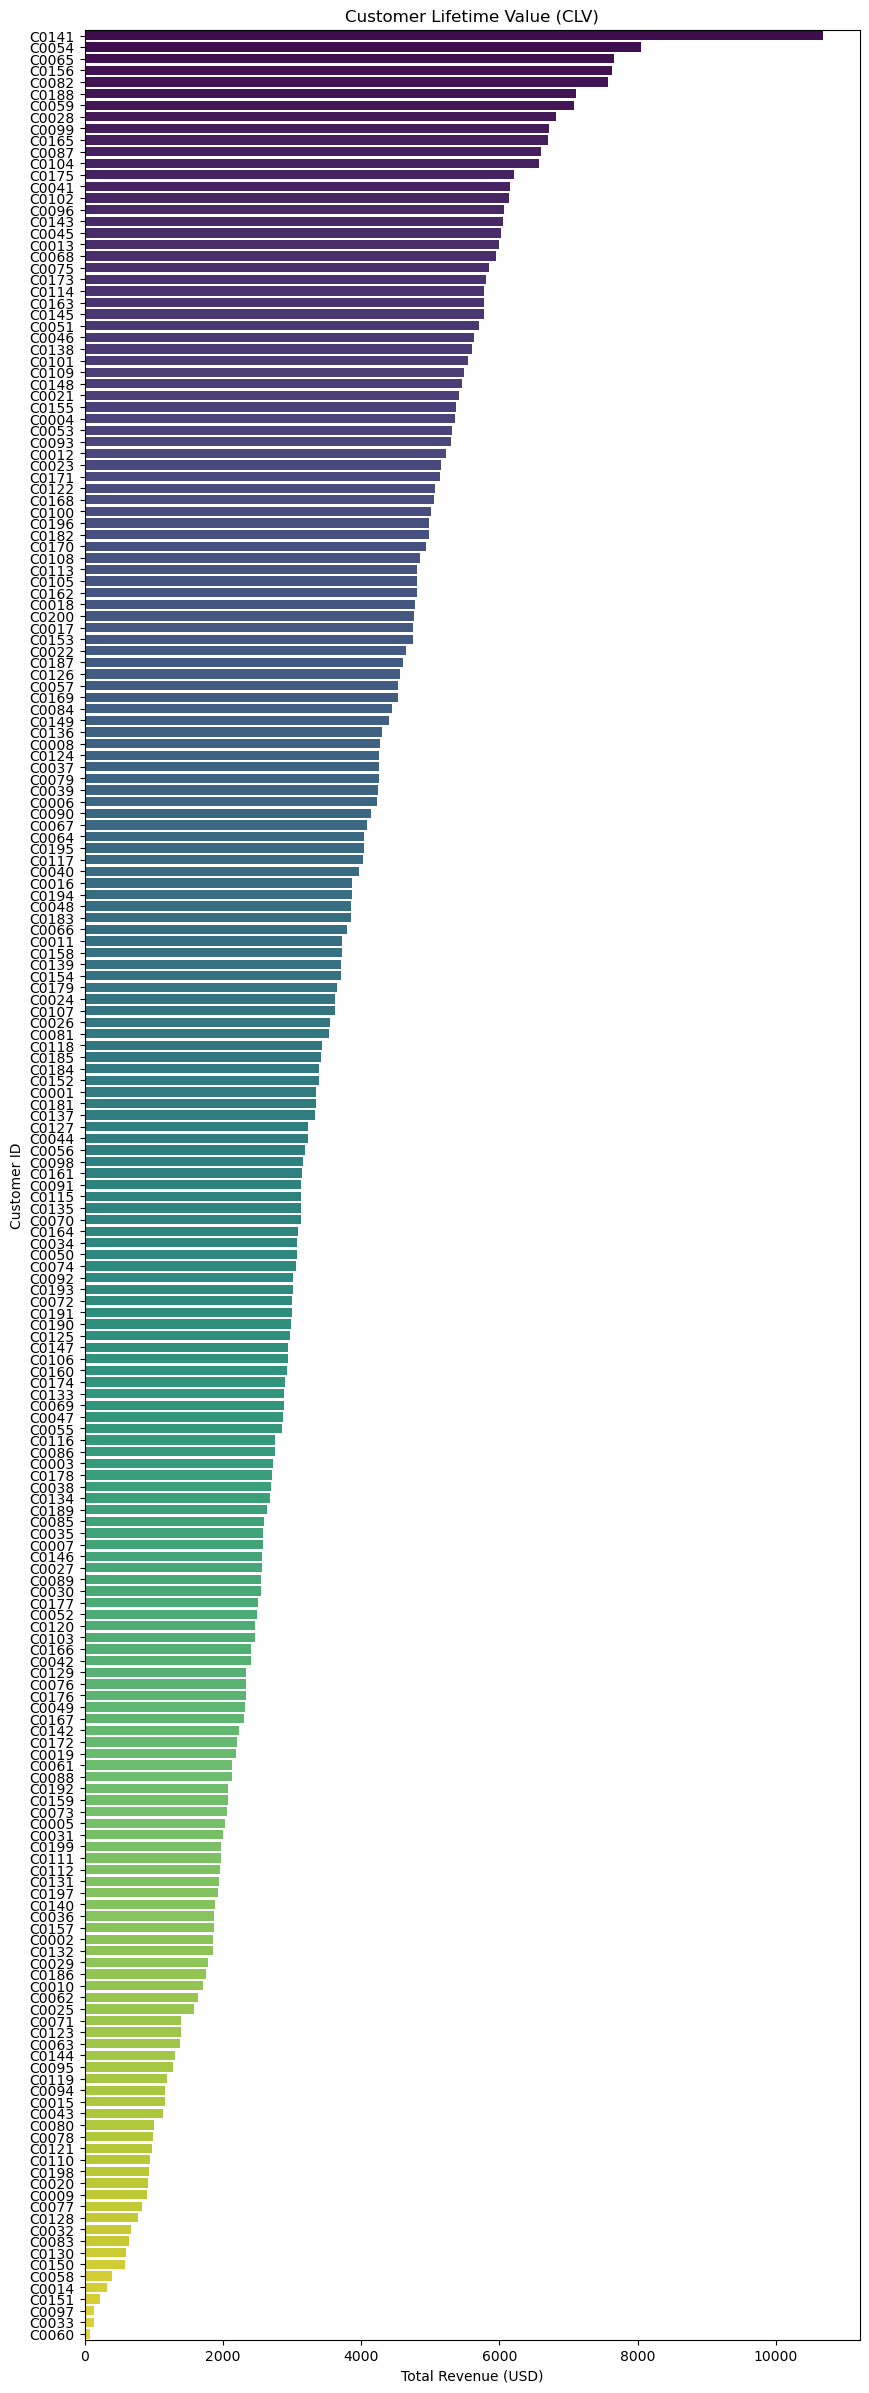

    CustomerID  TotalRevenue  TransactionCount  AverageOrderValue
140      C0141      10673.87                10        1067.387000
53       C0054       8040.39                 8        1005.048750
64       C0065       7663.70                10         766.370000
155      C0156       7634.45                11         694.040909
81       C0082       7572.91                 7        1081.844286
..         ...           ...               ...                ...
13       C0014        318.66                 1         318.660000
150      C0151        223.96                 1         223.960000
96       C0097        137.54                 1         137.540000
32       C0033        132.64                 1         132.640000
59       C0060         82.36                 1          82.360000

[199 rows x 4 columns]


In [54]:
# Group by CustomerID
customer_clv = merged_df.groupby("CustomerID").agg(
    TotalRevenue=("TotalValue", "sum"),
    TransactionCount=("TransactionID", "count"),
    AverageOrderValue=("TotalValue", "mean")
).reset_index()

# Sort by Total Revenue
high_value_customers = customer_clv.sort_values(by="TotalRevenue", ascending=False)

# Visualize
plt.figure(figsize=(10, 30))
sns.barplot(data=high_value_customers, x="TotalRevenue", y="CustomerID", palette="viridis")
plt.title("Customer Lifetime Value (CLV)")
plt.xlabel("Total Revenue (USD)")
plt.ylabel("Customer ID")
plt.show()

print(high_value_customers)


<h3>Sales Trend Over Time</h3>

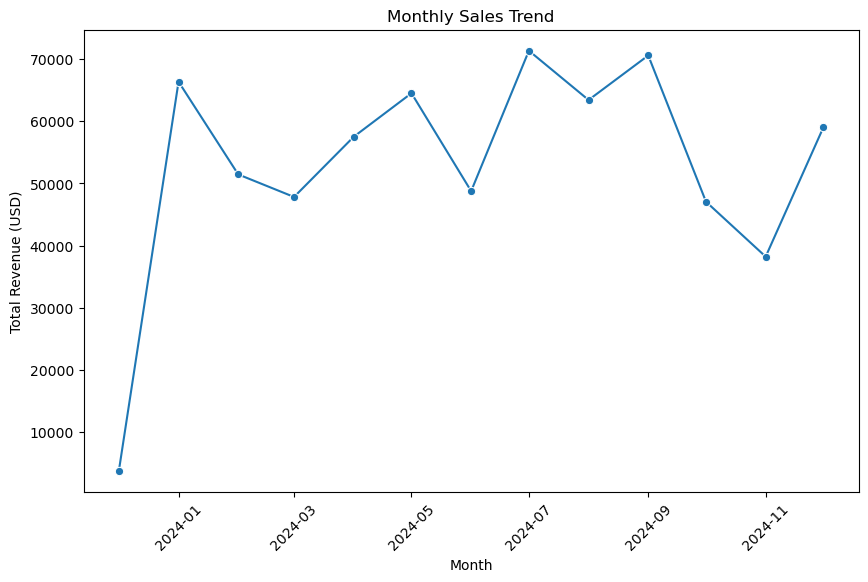

    YearMonth  TotalRevenue
0  2023-12-01       3769.52
1  2024-01-01      66376.39
2  2024-02-01      51459.27
3  2024-03-01      47828.73
4  2024-04-01      57519.06
5  2024-05-01      64527.74
6  2024-06-01      48771.18
7  2024-07-01      71366.39
8  2024-08-01      63436.74
9  2024-09-01      70603.75
10 2024-10-01      47063.22
11 2024-11-01      38224.37
12 2024-12-01      59049.20


In [55]:
# Extract year and month
merged_df["YearMonth"] = merged_df["TransactionDate"].dt.to_period("M")

# Group by YearMonth
monthly_sales = merged_df.groupby("YearMonth").agg(
    TotalRevenue=("TotalValue", "sum")
).reset_index()

# Convert back to datetime for plotting
monthly_sales["YearMonth"] = monthly_sales["YearMonth"].dt.to_timestamp()

# Visualize
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales, x="YearMonth", y="TotalRevenue", marker="o")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue (USD)")
plt.xticks(rotation=45)
plt.show()

print(monthly_sales)


<h3>
    product price and quantity sold
</h3>

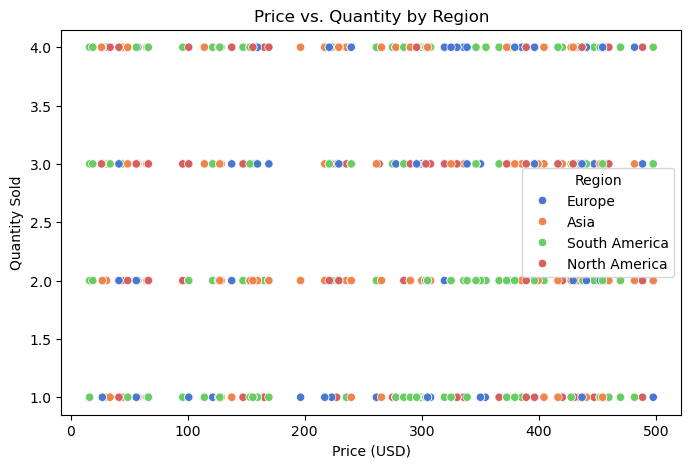

In [56]:
# Scatter plot of Price_x vs. Quantity
plt.figure(figsize=(8, 5))
sns.scatterplot(data=merged_df, x="Price_x", y="Quantity", hue="Region", palette="muted")
plt.title("Price vs. Quantity by Region")
plt.xlabel("Price (USD)")
plt.ylabel("Quantity Sold")
plt.show()
